<a href="https://colab.research.google.com/github/nv-hiep/dust_grain_fit/blob/main/plot_dust_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plot dust data**

# 1. Mount the google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
# !ls

Mounted at /content/gdrive


# 2. Root directory

In [2]:
cd '/content/gdrive/My Drive/Colab Notebooks/dustfit'

/content/gdrive/My Drive/Colab Notebooks/dustfit


# 3. Import Libraries



In [41]:
#!/usr/bin/env python
from __future__ import print_function

import os

import matplotlib.pyplot as plt
import colorsys
import matplotlib
import numpy as np

from libs.dustgrains import DustGrains
from libs.dustdata   import DustData

%matplotlib inline

## 4. Data

In [4]:
# Path to the data
root_path = os.getcwd()
print(os.getcwd())
print(os.path.dirname(os.path.realpath('__file__')))

/content/gdrive/My Drive/Colab Notebooks/dustfit
/content/gdrive/My Drive/Colab Notebooks/dustfit


## 5. Size distribution

### 5.1. Size distribution - from observed data

In [16]:
# Read from data or not
obsdata = True

#### 5.1.1 Silicates

In [24]:
# Grain compostion
composition = 'silicates'

# DustGrains object
DG = DustGrains(composition, path=root_path, from_obs=obsdata)

In [27]:
def _plot(DG):
  lambda_ = DG.lambda_
  sizes   = DG.size_index 

  # Figure
  fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
  axes      = axes.flatten()

  for i in range(DG.n_sizes):
      # Colors
      pcolor = colorsys.hsv_to_rgb(float(i) / DG.n_sizes / 1.1, 1, 1)

      # Axis 1
      ax = axes[0]
      ax.plot(lambda_, DG.cabs[i, :], color=pcolor)
      
      ax.tick_params(labelsize=14)
      ax.set_xlabel(r'$\lambda$ [$\mu m$]', size=14)
      ax.set_ylabel('Absorption cross-section C(abs)', size=14)
      ax.set_xscale('log')
      ax.set_yscale('log')

      # Axis 2
      ax = axes[1]
      ax.plot(lambda_, DG.csca[i, :], color=pcolor)
      ax.set_xlabel(r'$\lambda$ [$\mu m$]', size=14)
      ax.set_ylabel('Scattering cross-section C(sca)', size=14)
      ax.set_xscale('log')
      ax.set_yscale('log')

      ax.set_title(DG.grain_type, size=16)

      
      # Axis 3
      ax = axes[2]
      ax.plot(lambda_, DG.cext[i, :], color=pcolor)
      ax.set_xlabel(r"$\lambda$ [$\mu m$]", size=14)
      ax.set_ylabel('Extinction cross-section C(ext)', size=14)
      ax.set_xscale('log')
      ax.set_yscale('log')

      
      # Axis 4
      ax = axes[3]
      ax.plot(DG.albedo_lambda, DG.albedo[i, :], '-', color=pcolor)

      ax.set_xlabel(r"$\lambda$ [$\mu m$]", size=14)
      ax.set_ylabel('Albedo', size=14)
      ax.set_xscale('log')

      
      # Axis 5
      ax = axes[4]
      ax.plot(DG.lambda_scat_g, DG.scat_g[i, :], '-', color=pcolor)
      ax.set_xlabel(r'$\lambda$ [$\mu m$]', size=14)
      ax.set_ylabel(r'g=cos($\theta$)', size=14)
      ax.set_xscale('log')

      
      # Axis 6
      ax = axes[5]
      # ax[1, 2].plot(DG.wavelengths_emission, DG.emission[i, :],\
      #               color=pcolor, label='size ID:'+str( sizes[i] ) )

      ax.plot(DG.lambda_emis, DG.emission[i, :], color=pcolor, label='' )

      ax.set_xlabel(r'$\lambda$ [$\mu m$]', size=14)
      ax.set_ylabel('Emission', size=14)

      ax.set_xscale('log')
      ax.set_yscale('log')
      ax.get_ylim()
      ax.set_ylim([1e-23, 1.])
      # ax.legend(loc='upper left', frameon=False, fontsize=12)
  # End - for

  # Show
  plt.tight_layout()
  plt.show()

NOTE: Different colors for different grain-sizes


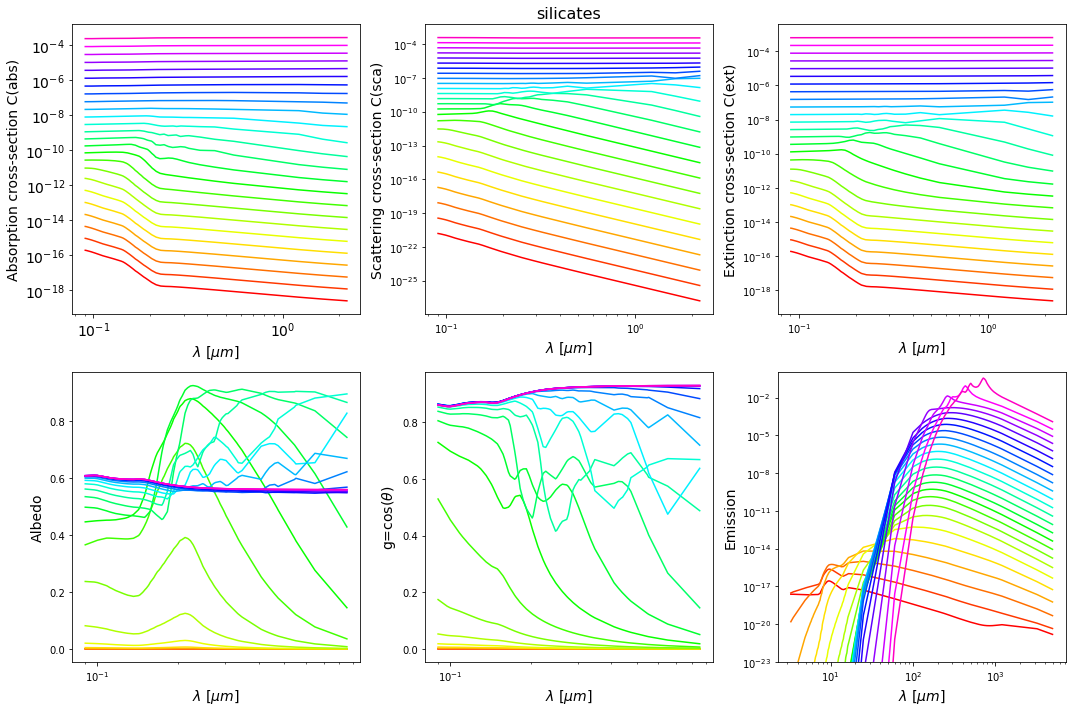

In [30]:
# plot
print('NOTE: Different colors for different grain-sizes')

_plot(DG)

#### 5.1.2 carbonaceous

In [31]:
# Grain compostion
composition = 'carbonaceous'

# DustGrains object
DG = DustGrains(composition, path=root_path, from_obs=obsdata)

NOTE: Different colors for different grain-sizes


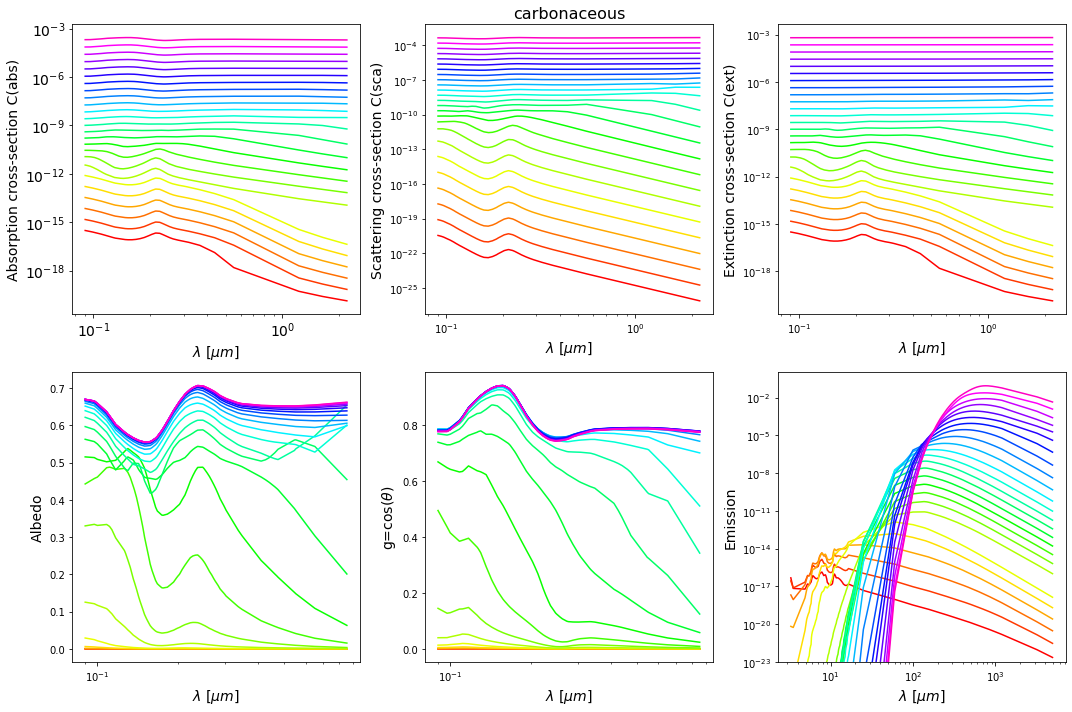

In [32]:
# plot
print('NOTE: Different colors for different grain-sizes')

_plot(DG)

### 5.2. Size distribution - from precomputed data

In [33]:
# Read from data or not
obsdata = False

#### 5.2.1 Silicates

In [36]:
# Grain compostion
composition = 'silicates'

# DustGrains object
DG = DustGrains(composition, path=root_path, from_obs=obsdata)

NOTE: Different colors for different grain-sizes


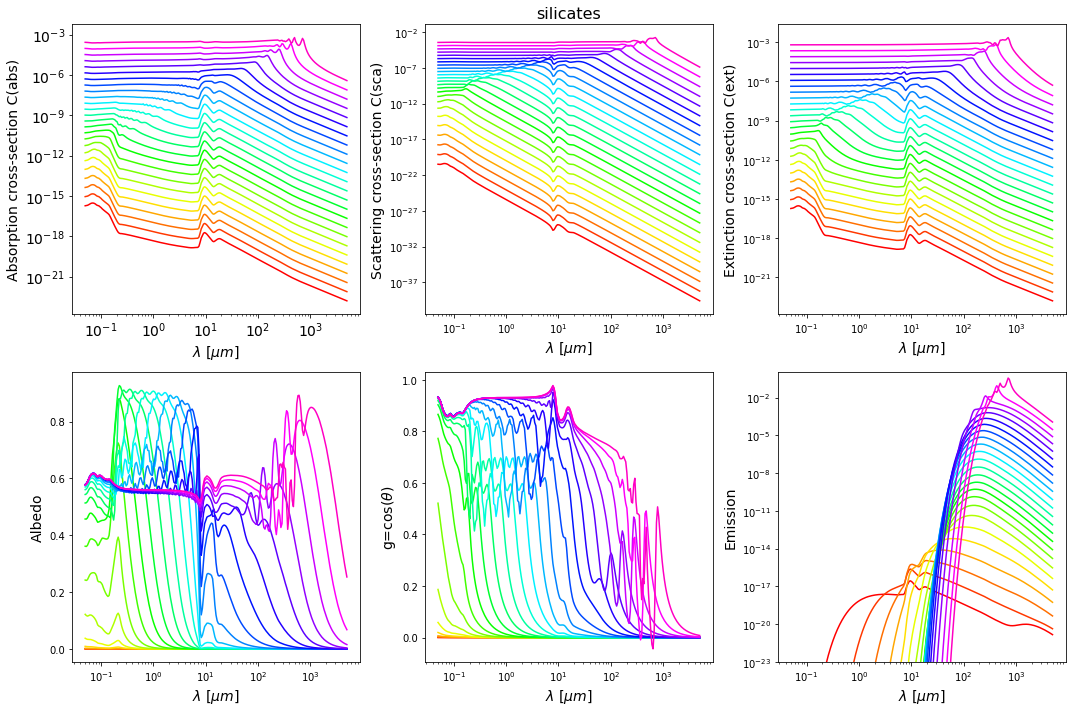

In [37]:
# plot
print('NOTE: Different colors for different grain-sizes')

_plot(DG)

#### 5.2.2 carbonaceous

In [38]:
# Grain compostion
composition = 'carbonaceous'

# DustGrains object
DG = DustGrains(composition, path=root_path, from_obs=obsdata)

NOTE: Different colors for different grain-sizes


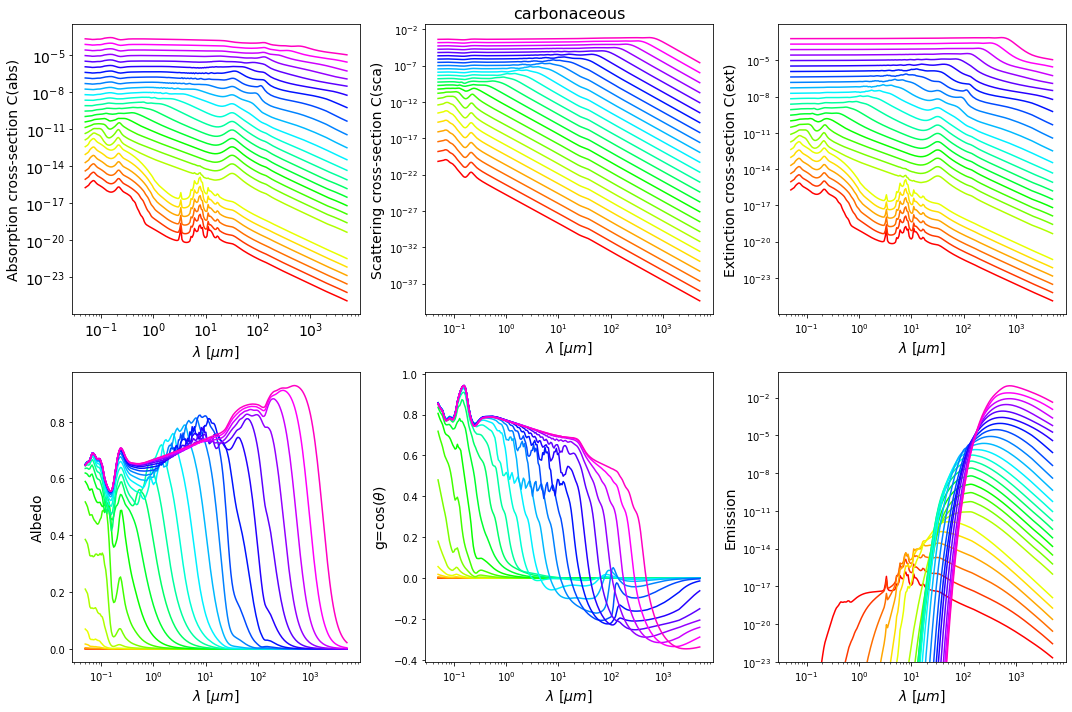

In [39]:
# plot
print('NOTE: Different colors for different grain-sizes')

_plot(DG)

## 6. Emission data

In [42]:
# Galactic / SMC
gal = 'MW'
path = os.path.join(root_path, 'data', gal)

# For reading data
data = DustData(path, emission=True)

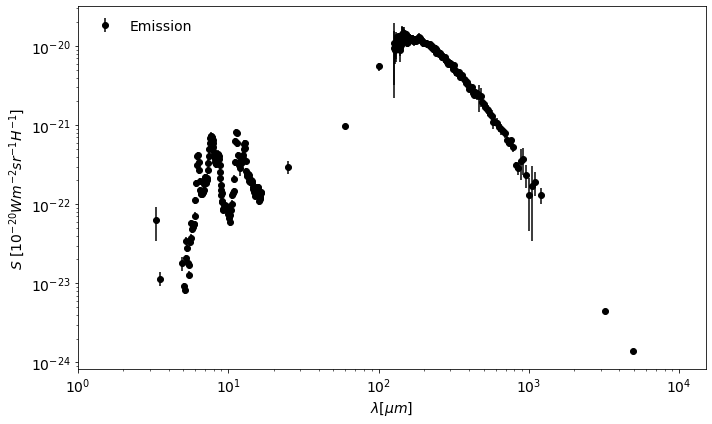

In [44]:
# Plot emission data
plt.figure( figsize=(10, 6) )
ax = plt.subplot(111)

# Plot
ax.errorbar(data.emis_lambda, data.spec_, yerr=data.spec_err, color='k', fmt='o', label='Emission')

# Decorate
# ax.text(1., 0.1, 'Case A', fontsize=14)

ax.tick_params(labelsize=14)
ax.set_xlabel(r'$\lambda [\mu m]$', size=14)
ax.set_ylabel(r'$S\ [10^{-20} W m^{-2} sr^{-1} H^{-1}]$', size=14)          # S = [10^-20 W m-2 sr-1 H-1]
ax.set_xscale('log')

ax.legend(loc='upper left', frameon=False, fontsize=14)
ax.loglog()
# ax.set_xscale('log')
ax.set_xlim(1., 1.5e4)
# plt.ylim(0.05, 1.)
# plt.grid()

plt.tight_layout()
plt.show()

## 7. Extinction data

In [45]:
# Class for reading data
data = DustData(path, extinction=True)

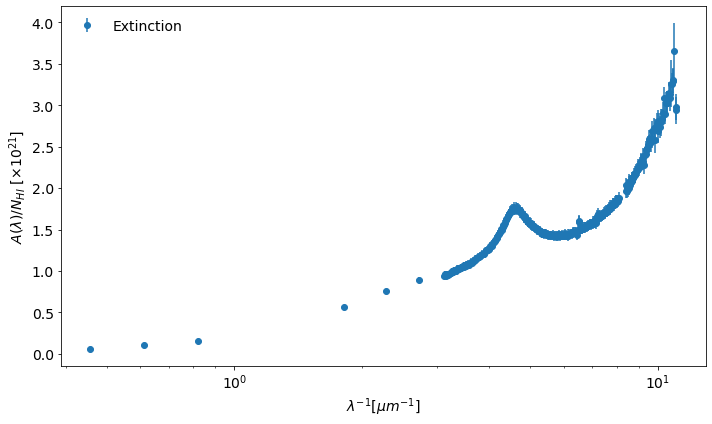

In [46]:
# Plot extinction data
# Figure
plt.figure( figsize=(10, 6) )
ax = plt.subplot(111)

# Plot
ax.errorbar(data.ext_wavenum, 1.e21*data.ext_AlNHI, yerr=1.e21*data.ext_AlNHI_err, fmt='o', label='Extinction')

# Decorate
# ax.text(1., 0.1, 'Case A', fontsize=14)

ax.tick_params(labelsize=14)
ax.set_xlabel(r'$\lambda^{-1} [\mu m^{-1}]$', size=14)
ax.set_ylabel(r'$A(\lambda)/N_{HI} \ [\times 10^{21}]$', size=14)
ax.set_xscale("log")

ax.legend(loc='upper left', frameon=False, fontsize=14)
# ax.loglog()
ax.set_xscale('log')
# ax.set_xlim(0.085, 3.)
# plt.ylim(0.05, 1.)
# plt.grid()

plt.tight_layout()
plt.show()

## 7. ISRF data (Interstellar radiation field)

In [47]:
# Class for reading data
data = DustData(path, ISRF=True)

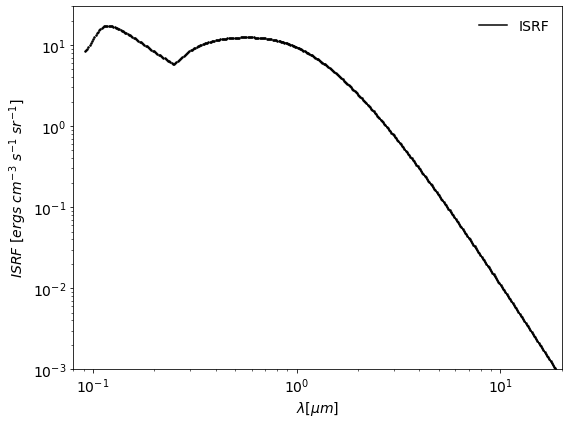

In [48]:
# Plot ISRF data
plt.figure( figsize=(8, 6) )
ax = plt.subplot(111)

# Plot
ax.plot(data.ISRF_lambda[500:], data.ISRF[500:], color='k', ls='-', label='ISRF')
ax.errorbar(data.ISRF_lambda, data.ISRF, yerr=data.ISRF*0., color='k', fmt='.', markersize=3, label='')

# Decorate
# ax.text(1., 0.1, 'Case A', fontsize=14)

ax.tick_params(labelsize=14)
ax.set_xlabel(r'$\lambda [\mu m]$', size=14)                              # lambda (in microns)
ax.set_ylabel(r'$ISRF\ [ergs\ cm^{-3}\ s^{-1}\ sr^{-1}]$', size=14)  # ISRF [erg/cm^3/s/st]

ax.legend(loc='upper right', frameon=False, fontsize=14)
ax.loglog()
# ax.set_xscale('log')
ax.set_xlim(0.08, 20.)
ax.set_ylim(1.e-3, 30.)
# plt.grid()

plt.tight_layout()
plt.show()

## 8. Scattering data

In [49]:
# Read data
data = DustData(path, scattering=True)

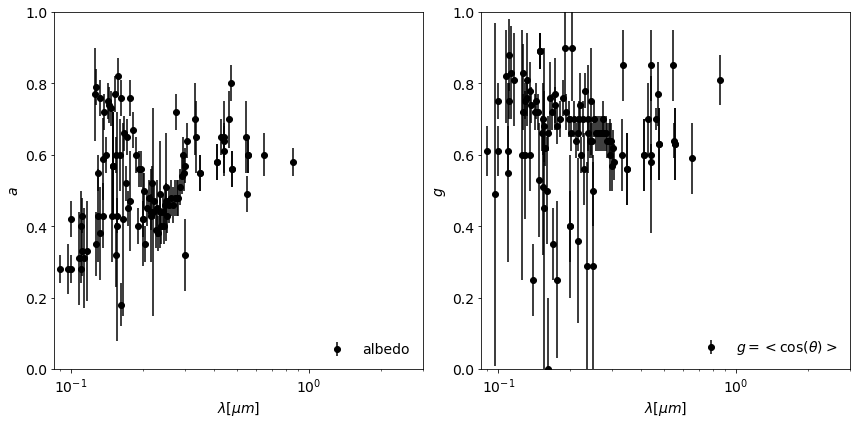

In [50]:
# Plot emission data
plt.figure( figsize=(12, 6) )
ax = plt.subplot(121)

# Plot
ax.errorbar(data.scat_albedo_lambda, data.scat_albedo, yerr=data.scat_albedo_err, color='k', fmt='o', label='albedo')

# Decorate
# ax.text(1., 0.1, 'Case A', fontsize=14)

ax.tick_params(labelsize=14)
ax.set_xlabel(r'$\lambda [\mu m]$', size=14)
ax.set_ylabel(r'$a$', size=14)          # S = [10^-20 W m-2 sr-1 H-1]

ax.legend(loc='lower right', frameon=False, fontsize=14)
# ax.loglog()
ax.set_xscale('log')
ax.set_xlim(0.085, 3.)
plt.ylim(0., 1.)
# plt.grid()

# subplot 2
ax = plt.subplot(122)

# Plot
ax.errorbar(data.scat_g_lambda, data.scat_g, yerr=data.scat_g_err, color='k', fmt='o', label=r'$g = < \mathrm{cos} (\theta) >$')

# Decorate
# ax.text(1., 0.1, 'Case A', fontsize=14)

ax.tick_params(labelsize=14)
ax.set_xlabel(r'$\lambda [\mu m]$', size=14)
ax.set_ylabel(r'$g$', size=14)          # S = [10^-20 W m-2 sr-1 H-1]

ax.legend(loc='lower right', frameon=False, fontsize=14)
# ax.loglog()
ax.set_xscale('log')
ax.set_xlim(0.085, 3.)
plt.ylim(0., 1.)
# plt.grid()

plt.tight_layout()
plt.show()

## 9. Abundance data

In [51]:
# Read data
data = DustData(path, abundance=True)

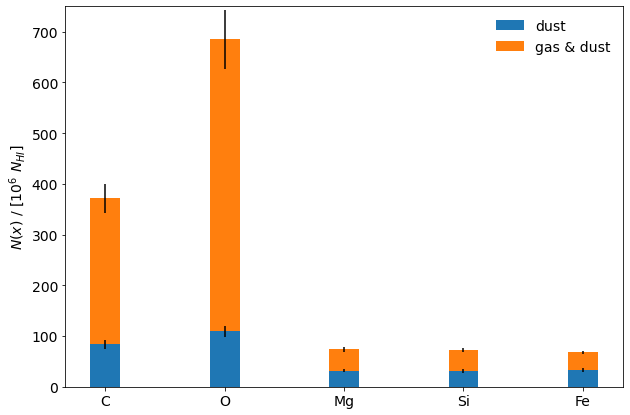

In [52]:
# Plot abundance data
N = len(data.atoms)

abundance = []
total     = []
abund_err = []
total_err = []
ind       = np.arange(N)    
width     = 0.25

for i,atom in enumerate(data.atoms):
    abundance.append( data.abundance[atom][0] )
    total.append( data.total_abund[atom][0] )
    abund_err.append( data.abundance[atom][1] )
    total_err.append( data.total_abund[atom][1] )

# Figure
fig = plt.subplots(figsize =(10, 7)) 

# plot
p1 = plt.bar(ind, abundance, width, yerr=abund_err) 
p2 = plt.bar(ind, total, width, bottom=abundance, yerr=total_err) 

# Decorate
plt.tick_params(labelsize=14)
plt.ylabel(r"$N(x)\ /\ [10^6\ N_{HI}]$", fontsize=14)
plt.xticks(ind, data.atoms) 

# plt.set_xlim(0.085, 3.)
plt.ylim(0., 750.)
plt.legend((p1[0], p2[0]), ('dust', 'gas & dust'), loc='upper right', frameon=False, fontsize=14)
  
plt.show()